In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './032018_48hrs/'

path_cyt = folder + 'Cytoplasm_Cancer_032018.xlsx'

markers = ['Cell ID', 
           'BT474-H2BeGFP (Cycle 1 - FITC)', 
           'MCL1 (Cycle 2 - Cy3)', 
           'p-p65NFkB (Cycle 2 - Cy5)', 
           'p-Akt (Cycle 3 - FITC)',
           'aSMA (Cycle 3 - Cy3)',
           'p-gH2AX (Cycle 3 - Cy5)',
           'GRP78 (Cycle 4 - FITC)',
           'Vimentin (Cycle 4 - Cy3)']

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
        
        'BT474+C3H-3,Cntrl(re,c2-4)',
        'BT474+C3H-3,30nM(re,c5-7)',
        'BT474+C3H-3,300nM(re,c8-10)']

def concat_df(path):
    dt = []
    for t in tabs:
        dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t, names=markers))
    df = pd.concat(dt, ignore_index=True)
    return df

In [2]:
df_cyt = concat_df(path_cyt)
df_cyt['Group'] = df_cyt['Cell ID'].apply(lambda x: ((x // 10**9) % 10 - 1) // 3)
print('*** Cytoplasm Dataset:')
df_cyt

*** Cytoplasm Dataset:


,Cell ID,BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Group
0,11100020013,311103.3,101851.6,43709.0,73056.7,30051.5,6120.7,16078.1,12079.2,0
1,11100030022,162176.2,183881.8,104492.1,206216.4,67026.0,23716.0,23564.9,31449.9,0
2,11100040016,538824.0,84439.7,45970.9,70549.5,30217.9,1426.4,20359.0,16116.3,0
3,11100050019,217196.1,58911.0,26316.6,27367.7,29239.0,2993.7,17980.0,21591.7,0
4,11100060017,55856.2,80966.3,32906.0,21788.7,23781.4,1625.9,7795.0,15434.6,0
...,...,...,...,...,...,...,...,...,...,...
172720,49911641030,38079.1,88751.1,95950.0,25348.7,24686.5,16116.3,21898.2,24713.6,2
172721,49911681033,262936.0,68296.2,24322.2,35124.5,25447.2,10294.5,11867.8,31020.3,2
172722,49911691034,48846.5,44616.7,26597.6,20752.9,14942.1,3119.3,5905.9,17833.1,2
172723,49911721034,96468.8,40339.2,16100.2,26939.8,24199.1,10418.5,12620.9,15018.5,2


In [3]:
# All columns in the Cytoplasm dataset's information
df_cyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172725 entries, 0 to 172724
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         172725 non-null  int64  
 1   BT474-H2BeGFP (Cycle 1 - FITC)  172725 non-null  float64
 2   MCL1 (Cycle 2 - Cy3)            172725 non-null  float64
 3   p-p65NFkB (Cycle 2 - Cy5)       172725 non-null  float64
 4   p-Akt (Cycle 3 - FITC)          172725 non-null  float64
 5   aSMA (Cycle 3 - Cy3)            172725 non-null  float64
 6   p-gH2AX (Cycle 3 - Cy5)         172725 non-null  float64
 7   GRP78 (Cycle 4 - FITC)          172725 non-null  float64
 8   Vimentin (Cycle 4 - Cy3)        172725 non-null  float64
 9   Group                           172725 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 13.2 MB


In [4]:
# Check if duplicate ID exists in Cytoplasm dataset
df_cyt['Cell ID'].value_counts()

31610480699    1
47209530914    1
15703000626    1
12800020019    1
24706600499    1
              ..
22311521036    1
33903230251    1
14900970253    1
27408130825    1
46303100343    1
Name: Cell ID, Length: 172725, dtype: int64

In [5]:
# Check the correctness of groups
df_cyt['Group'].value_counts()

0    61749
1    57305
2    53671
Name: Group, dtype: int64

In [6]:
# Cytoplasm markers' statistics
df_cyt[df_cyt.columns[1:-1]].describe()

,BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3)
count,1.7e+05,1.7e+05,1.7e+05,1.7e+05,1.7e+05,1.7e+05,1.7e+05,1.7e+05
mean,9.1e+04,1.2e+05,5.8e+04,5.5e+04,5.0e+04,1.1e+04,2.5e+04,4.0e+04
std,1.3e+05,8.3e+04,6.8e+04,3.9e+04,6.8e+04,1.8e+04,2.7e+04,7.2e+04
min,2.1e+04,0.0e+00,5.1e+02,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,2.8e+04,7.3e+04,1.9e+04,3.1e+04,2.5e+04,4.2e+03,1.6e+04,2.4e+04
50%,4.1e+04,1.0e+05,3.6e+04,4.5e+04,3.5e+04,7.1e+03,2.2e+04,3.3e+04
75%,8.9e+04,1.5e+05,7.5e+04,6.7e+04,5.3e+04,1.3e+04,3.0e+04,4.6e+04
max,2.7e+06,8.8e+06,3.9e+06,3.6e+06,5.5e+06,1.2e+06,4.2e+06,8.8e+06


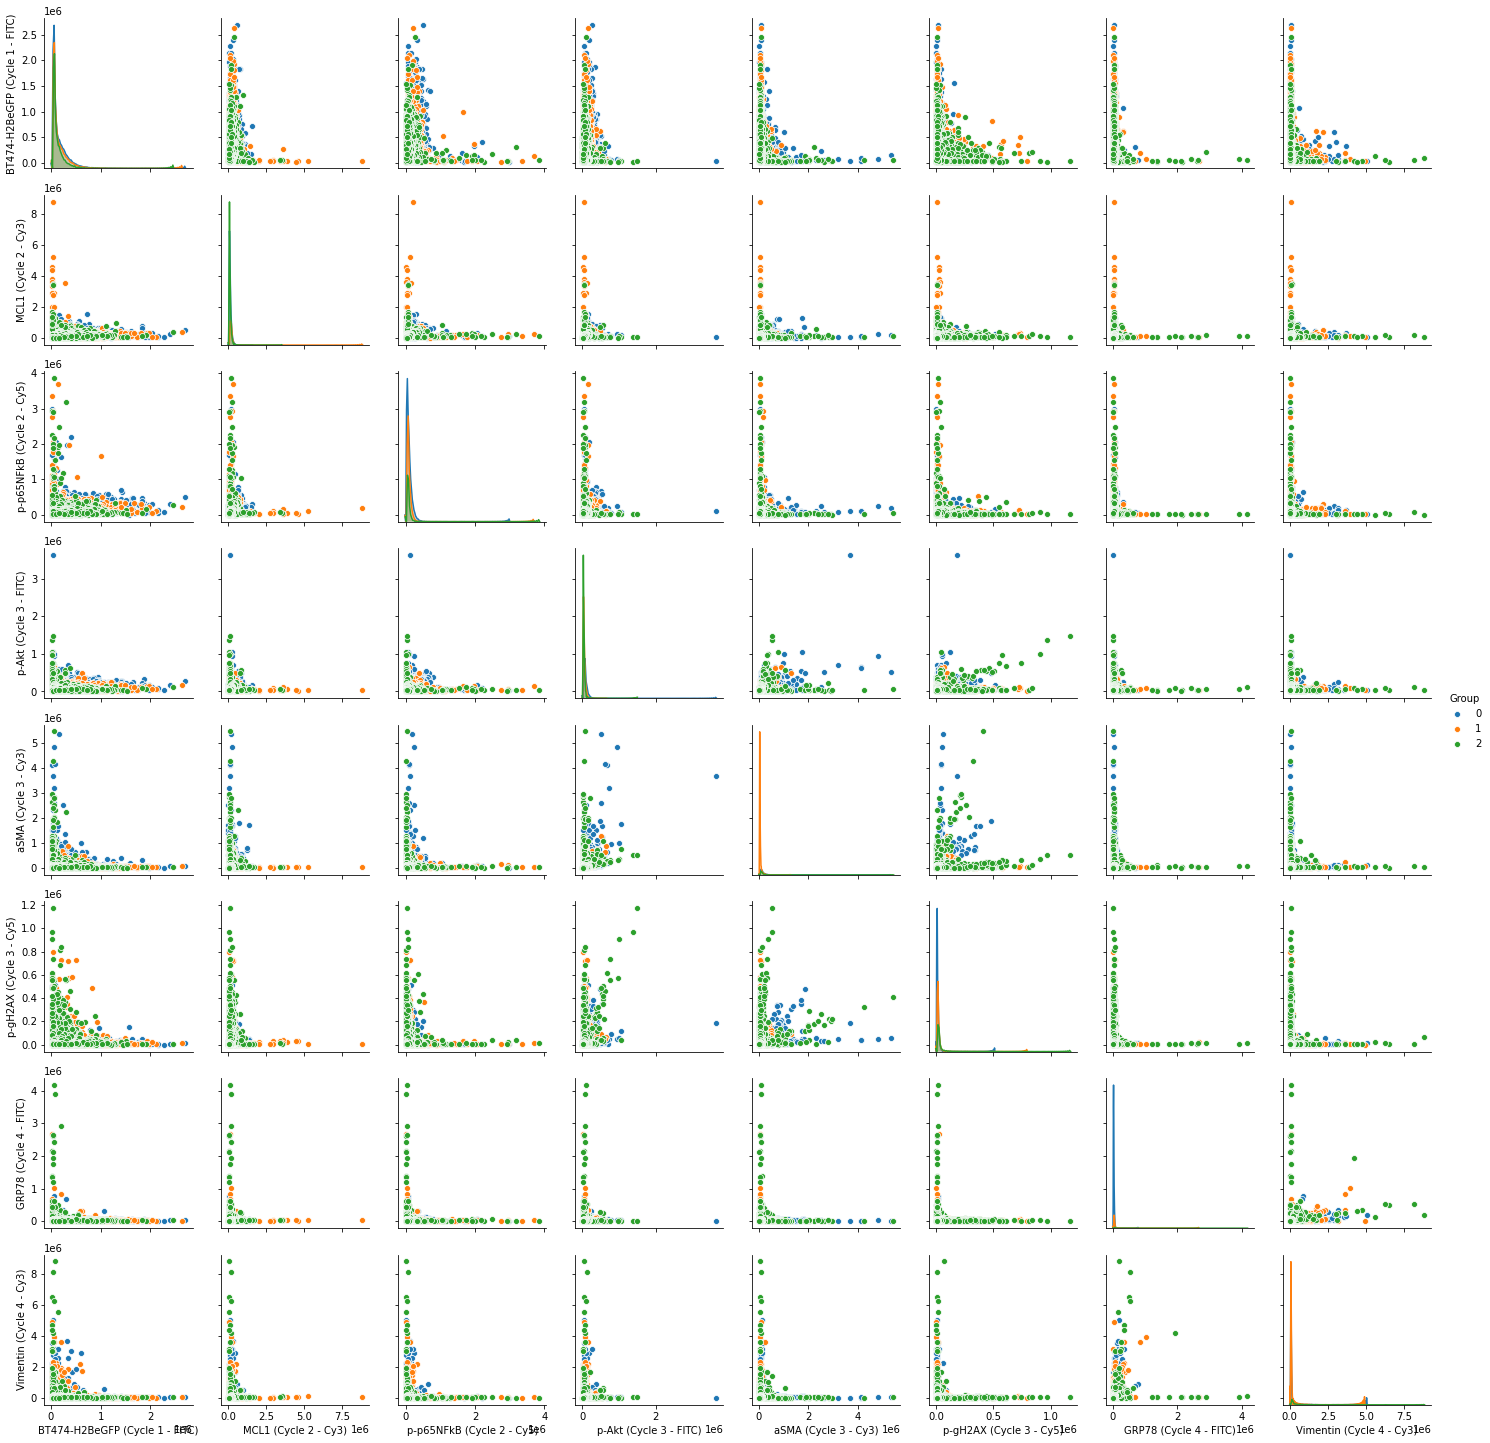

In [7]:
sns.pairplot(data=df_cyt, vars=df_cyt.columns[1:-1], hue='Group')
plt.show()